## Ungraded Lab: MNIST Autoencoder

You will now work on an autoencoder that works on the [MNIST dataset](https://www.tensorflow.org/datasets/catalog/mnist). This will encode the inputs to lower resolution images. The decoder should then be able to generate the original input from this compressed representation.

In [3]:
#pip install tensorflow_datasets

  Using cached tensorflow_datasets-4.9.6-py3-none-any.whl.metadata (9.5 kB)
  Using cached dm_tree-0.1.8-cp312-cp312-win_amd64.whl.metadata (2.0 kB)
  Using cached immutabledict-4.2.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached promise-2.3-py3-none-any.whl
  Using cached simple_parsing-0.1.6-py3-none-any.whl.metadata (7.3 kB)
  Using cached tensorflow_metadata-1.15.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached etils-1.9.4-py3-none-any.whl.metadata (6.4 kB)
  Using cached importlib_resources-6.4.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached docstring_parser-0.16-py3-none-any.whl.metadata (3.0 kB)
Using cached tensorflow_datasets-4.9.6-py3-none-any.whl (5.1 MB)
Using cached etils-1.9.4-py3-none-any.whl (164 kB)
Using cached dm_tree-0.1.8-cp312-cp312-win_amd64.whl (101 kB)
Using cached immutabledict-4.2.0-py3-none-any.whl (4.7 kB)
Using cached simple_parsing-0.1.6-py3-none-any.whl (112 kB)
Using cached tensorflow_metadata-1.15.0-py3-none-any.whl (28 kB)
Using cached docs


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Imports

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
  
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

## Prepare the Dataset

You will load the MNIST data from TFDS into train and test sets. Let's first define a preprocessing function for normalizing and flattening the images. Since we'll be training an autoencoder, this will return `image, image` because the input will also be the target or label while training.


In [2]:
def map_image(image, label):
  '''Normalizes and flattens the image. Returns image as input and label.'''
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(784,))

  return image, image

In [3]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

## Build the Model

You will now build a simple autoencoder to ingest the data. Like before, the encoder will compress the input and reconstructs it in the decoder output. ![Autoencoder Flowchart](auto.png)

In [4]:
#Bulid the Model
def SimpleAuto(inputs):
    encoder = tf.keras.layers.Dense(units = 32 , activation = "relu")(inputs) #output is 32 
    decoder = tf.keras.layers.Dense(units = 784 , activation = "sigmoid")(encoder) 
    return encoder , decoder
    
# set the input shape
inputs = tf.keras.layers.Input(shape = (784,))

# get the encoder and decoder output
encoder_output , decoder_output  = SimpleAuto(inputs)

# setup the encoder Model because you will visualize its output later
encoder = tf.keras.Model(inputs = inputs , outputs = encoder_output)

# setup the autoencoder Model
autoencoder = tf.keras.Model(inputs = inputs , outputs = decoder_output)


In [6]:
autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# #Bulid the Model
# def auto(inputs):
#     encoder = tf.keras.layers.Dense(128, activation='relu')(inputs)
#     encoder = tf.keras.layers.Dense(64, activation='relu')(encoder)
#     encoder = tf.keras.layers.Dense(32, activation='relu')(encoder)
#     decoder = tf.keras.layers.Dense(64, activation='relu')(encoder)
#     decoder = tf.keras.layers.Dense(128, activation='relu')(decoder)
#     decoder = tf.keras.layers.Dense(784, activation="sigmoid")(encoder)
#     return encoder,decoder


# # set the input shape
# inputs = tf.keras.layers.Input(shape=(784,))


# # get the encoder and decoder output
# encoder_output, decoder_output = auto(inputs)


# # setup the encoder Model because you will visualize its output later
# encoder_model = tf.keras.Model(inputs= inputs, outputs= encoder_output)

# # setup the autoencoder Model
# autoencoder = tf.keras.Model(inputs= inputs, outputs= decoder_output)


In [20]:
# autoencoder.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,688 (533.94 KB)

 Trainable params: 136,688 (533.94 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

You will setup the model for training. You can use binary crossentropy to measure the loss between pixel values that range from 0 (black) to 1 (white).

In [7]:
# Compile the model using Adam Optimizer , binary_crossentropy and  metrics=['accuracy']
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(), loss='binary_crossentropy')



## Train the Model

In [8]:
# train the model using train_dataset,steps_per_epoch=step,epochs=10
step = 60000 // BATCH_SIZE
his = autoencoder.fit(train_dataset, steps_per_epoch=step, epochs=20)

Epoch 1/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3167
Epoch 2/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1487
Epoch 3/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1235
Epoch 4/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1109
Epoch 5/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1035
Epoch 6/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0989
Epoch 7/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0964
Epoch 8/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0952
Epoch 9/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0946
Epoch 10/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0942
Epoch 11/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0940
Epoch 12/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0937
Epoch 13/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0935
Epoch 14/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0935
Epoch 15/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - 

In [9]:
his

## Display sample results

You can now visualize the results. The utility functions below will help in plotting the encoded and decoded values.

Text(0, 0.5, 'Loss')

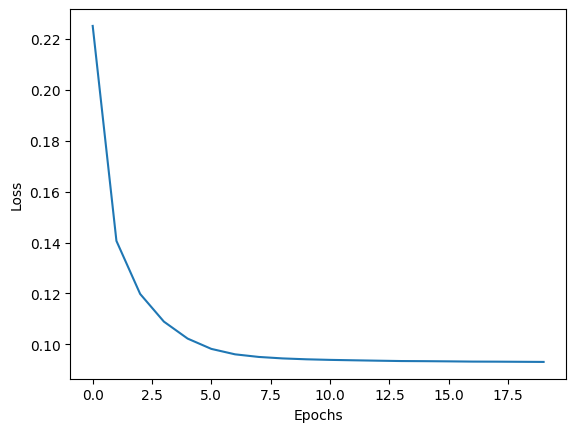

In [10]:
plt.plot(his.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [11]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


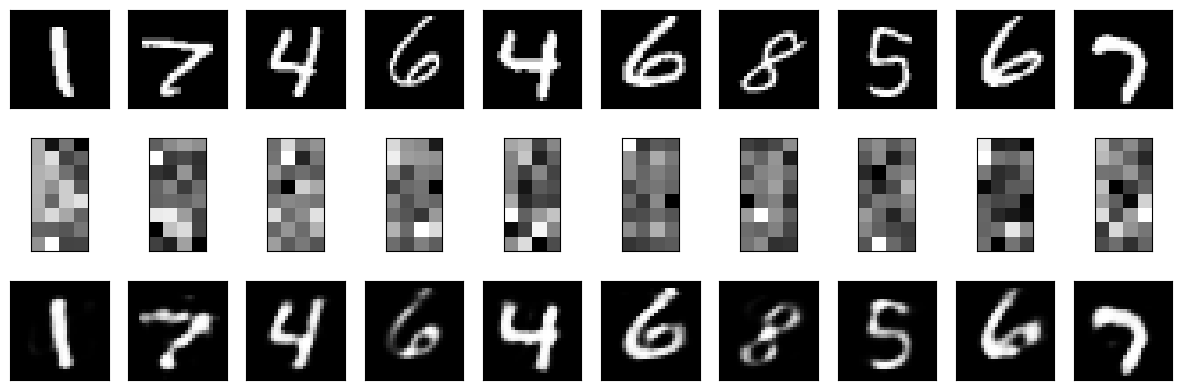

In [12]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output

encoded_predicted = encoder.predict(test_dataset)

# get a prediction for the test batch
simple_predicted = autoencoder.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])

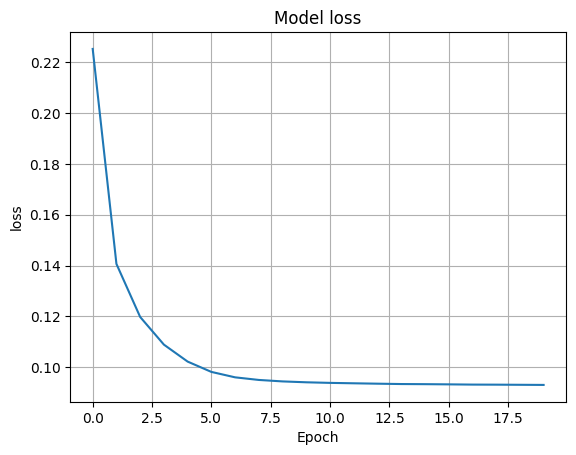

In [16]:
import matplotlib.pyplot as plt

# Retrieve accuracy values from the history object
accuracy = his.history['loss']

# Plot the accuracy
plt.plot(accuracy)
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()


# DEEP_AUTO_ENCODER

In [27]:
#Bulid the Model
def Deep(inputs):
    encoder = tf.keras.layers.Dense(128, activation='relu')(inputs)
    encoder = tf.keras.layers.Dense(64, activation='relu')(encoder)
    encoder = tf.keras.layers.Dense(32, activation='relu')(encoder)
    decoder = tf.keras.layers.Dense(64, activation='relu')(encoder)
    decoder = tf.keras.layers.Dense(128, activation='relu')(decoder)
    decoder = tf.keras.layers.Dense(784, activation="sigmoid")(decoder)
    return encoder,decoder

# get the encoder and decoder output
encoder_output, decoder_output = Deep(inputs)


# setup the encoder Model because you will visualize its output later
encoder_model = tf.keras.Model(inputs= inputs, outputs= encoder_output)

# setup the autoencoder Model
deep_auto = tf.keras.Model(inputs= inputs, outputs= decoder_output)


In [28]:
deep_auto.summary()

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
deep_auto.compile(optimizer='adam', 
                    loss='binary_crossentropy', 
                    metrics=['accuracy'])

In [30]:
# train the model using train_dataset,steps_per_epoch=step,epochs=10
step = int(60000 / BATCH_SIZE)
history = deep_auto.fit(train_dataset, steps_per_epoch=step, epochs=50)

Epoch 1/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.0084 - loss: 0.2847
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0090 - loss: 0.1330
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0109 - loss: 0.1182
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0113 - loss: 0.1110
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0126 - loss: 0.1063
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0120 - loss: 0.1027
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0127 - loss: 0.0996
Epoch 8/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0129 - loss: 0.0975
Epoch 9/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0123 - loss: 0.0957
Epoch 10/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0124 - loss: 0.0946
Epoch 11/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.0123 - loss: 0.0934
Epoch 12/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


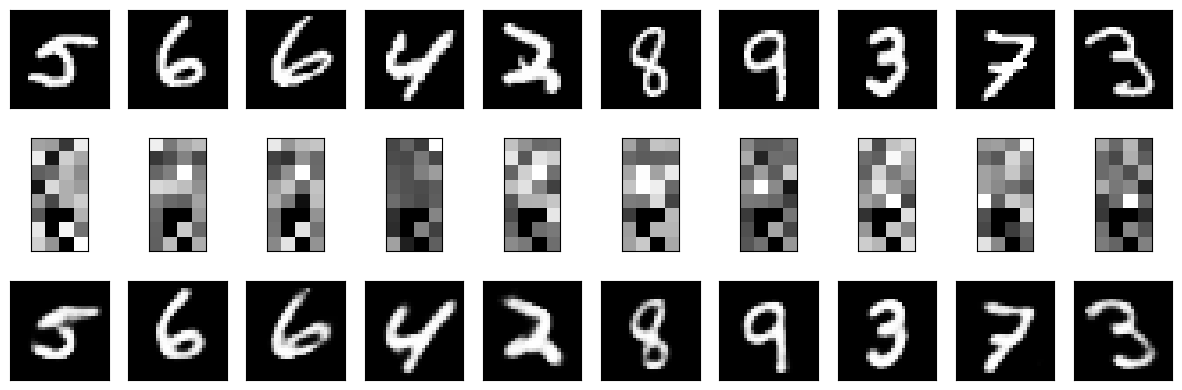

In [31]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# get the encoder output
encoded_predicted = encoder_model.predict(test_dataset)

# get a prediction for the test batch
simple_predicted = deep_auto.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])

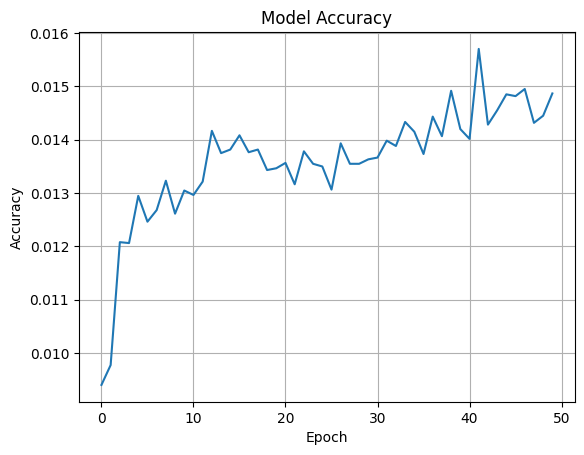

In [32]:
import matplotlib.pyplot as plt

# Retrieve accuracy values from the history object
accuracy = history.history['accuracy']

# Plot the accuracy
plt.plot(accuracy)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


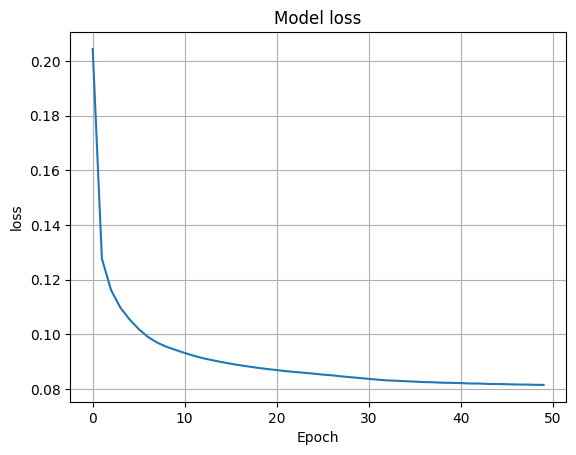

In [33]:
accuracy = history.history['loss']

# Plot the accuracy
plt.plot(accuracy)
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()


# CNN_AutoEncoder

In [34]:
def map_image(image, label):
  '''Normalizes and flattens the image. Returns image as input and label.'''
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(28,28,1))# change dimension

  return image, image

In [35]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('fashion_mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('fashion_mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

c:\Users\Aniket\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  75%|███████▌  | 3/4 [00:02<00:00,  1.44 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:07<00:00,  1.97s/ url]


Dataset fashion_mnist downloaded and prepared to C:\Users\Aniket\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [36]:
def cnn_encoder(inputs):
    conv_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same")(inputs)
    max_pool_1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv_1)  # Downsample to (14, 14)
    
    conv_2 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same")(max_pool_1)
    max_pool_2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv_2)  # Downsample to (7, 7)
    
    return max_pool_2

In [37]:
def bottle_neck(inputs):
    bottle_neck_layer = tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding="same")(inputs)
    encoder_visualization = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), activation="sigmoid", padding="same")(bottle_neck_layer)
    return bottle_neck_layer, encoder_visualization

In [38]:
def decoder(inputs):
    conv_1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same")(inputs)
    up_sample_1 = tf.keras.layers.UpSampling2D(size=(2, 2))(conv_1)  # Upsample to (14, 14)
    
    conv_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same")(up_sample_1)
    up_sample_2 = tf.keras.layers.UpSampling2D(size=(2, 2))(conv_2)  # Upsample to (28, 28)
    
    conv_3 = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), activation="sigmoid", padding="same")(up_sample_2)
    return conv_3

In [39]:
def cnn_autoencoder():
    inputs = tf.keras.layers.Input(shape=(28, 28, 1))  # Input shape for grayscale image
    encoder_output = cnn_encoder(inputs)
    bottleneck_output, encoder_visualization = bottle_neck(encoder_output)
    decoder_output = decoder(bottleneck_output)
    cnn_model = tf.keras.Model(inputs=inputs, outputs=decoder_output)
    encoder_model = tf.keras.Model(inputs=inputs, outputs=encoder_visualization)
    return cnn_model, encoder_model


In [40]:
cnn_model, encoder_model = cnn_autoencoder()
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 1)      │           577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 739,073 (2.82 MB)

 Trainable params: 739,073 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
step=60000//BATCH_SIZE
his=cnn_model.fit(train_dataset,steps_per_epoch=step,epochs=7)

Epoch 1/7
468/468 ━━━━━━━━━━━━━━━━━━━━ 137s 286ms/step - accuracy: 0.4987 - loss: 0.3349
Epoch 2/7
468/468 ━━━━━━━━━━━━━━━━━━━━ 141s 301ms/step - accuracy: 0.5097 - loss: 0.2620
Epoch 3/7
468/468 ━━━━━━━━━━━━━━━━━━━━ 132s 282ms/step - accuracy: 0.5097 - loss: 0.2565
Epoch 4/7
468/468 ━━━━━━━━━━━━━━━━━━━━ 129s 276ms/step - accuracy: 0.5101 - loss: 0.2533
Epoch 5/7
468/468 ━━━━━━━━━━━━━━━━━━━━ 130s 278ms/step - accuracy: 0.5105 - loss: 0.2514
Epoch 6/7
468/468 ━━━━━━━━━━━━━━━━━━━━ 135s 289ms/step - accuracy: 0.5104 - loss: 0.2504
Epoch 7/7
468/468 ━━━━━━━━━━━━━━━━━━━━ 131s 280ms/step - accuracy: 0.5104 - loss: 0.2496


Text(0, 0.5, 'Loss')

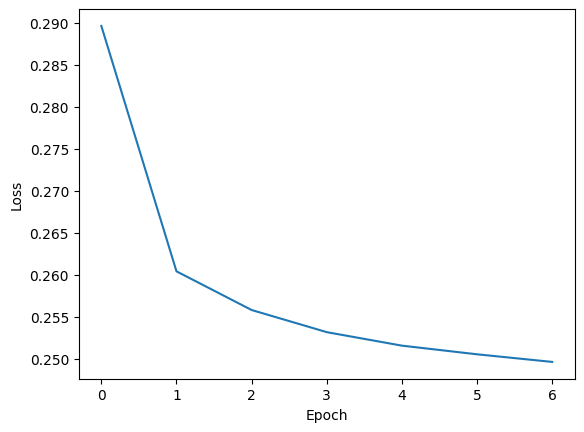

In [42]:
plt.plot(his.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [44]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,1))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


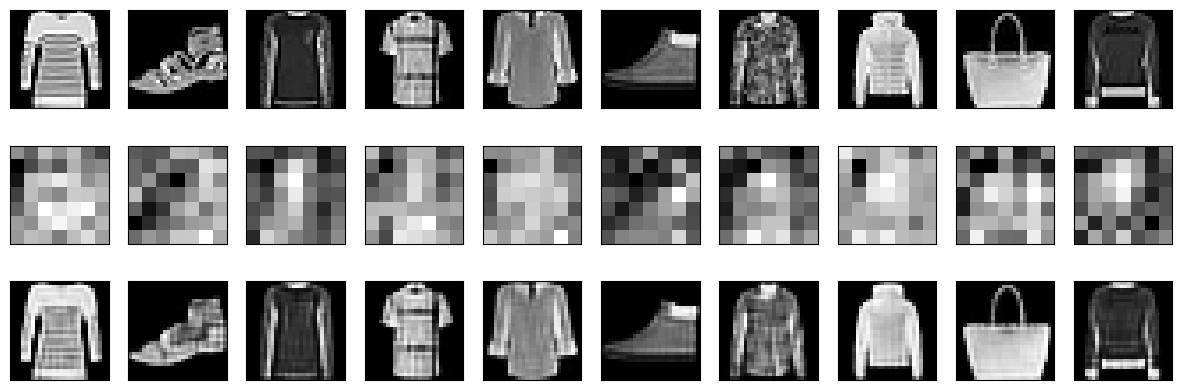

In [45]:

test_dataset = test_dataset.take(1)
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

idxs = np.random.choice(BATCH_SIZE, size=10)
encoded_predicted = encoder_model.predict(test_dataset)

# get a prediction for the test batch
simple_predicted = cnn_model.predict(test_dataset)

# display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs],enc_shape=(7,7)) #added enc_shape

# Denoising_Autoencoder

In [46]:
def map_image_with_noise (image , label):
    noise_factor=0.5
    image = tf.cast(image , dtype =tf.float32 )
    image = image /255.0
    factor = noise_factor * tf.random.normal(shape = image.shape)
    image_noisy = image + factor
    image_noisy = tf.clip_by_value(image_noisy , 0.0 , 1.0)
    return image_noisy , image
    

In [47]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('fashion_mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image_with_noise)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('fashion_mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image_with_noise)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

In [48]:
def denoising_encoder(inputs):
    conv_1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same")(inputs)
    max_pool_1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv_1)  # Downsample to (14, 14)
    
    conv_2 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same")(max_pool_1)
    max_pool_2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv_2)  # Downsample to (7, 7)
    
    return max_pool_2

In [49]:
def decoder(inputs):
    conv_1 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding="same")(inputs)
    up_sample_1 = tf.keras.layers.UpSampling2D(size=(2, 2))(conv_1)  # Upsample to (14, 14)
    
    conv_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same")(up_sample_1)
    up_sample_2 = tf.keras.layers.UpSampling2D(size=(2, 2))(conv_2)  # Upsample to (28, 28)
    
    conv_3 = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), activation="sigmoid", padding="same")(up_sample_2)
    return conv_3


In [50]:
def build_autoencoder():
    inputs = tf.keras.layers.Input(shape=(28, 28, 1))
    encoded = denoising_encoder(inputs)
    decoded = decoder(encoded)
    autoencoder = tf.keras.Model(inputs, decoded)
    return autoencoder

In [51]:
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [52]:
autoencoder.summary()

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 1)      │           577 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 296,449 (1.13 MB)

 Trainable params: 296,449 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history = autoencoder.fit(train_dataset,
                          epochs=10,
                          steps_per_epoch=60000 // BATCH_SIZE,
                          validation_data=test_dataset,
                          validation_steps=10000 // BATCH_SIZE)

Epoch 1/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 120s 252ms/step - loss: 0.3576 - val_loss: 0.3030
Epoch 2/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 109s 233ms/step - loss: 0.2996 - val_loss: 0.2977
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 92s 197ms/step - loss: 0.2949 - val_loss: 0.2946
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 87s 187ms/step - loss: 0.2920 - val_loss: 0.2930
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 137s 293ms/step - loss: 0.2900 - val_loss: 0.2918
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 97s 207ms/step - loss: 0.2892 - val_loss: 0.2904
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 135s 289ms/step - loss: 0.2880 - val_loss: 0.2895
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 97s 208ms/step - loss: 0.2871 - val_loss: 0.2888
Epoch 9/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 111s 236ms/step - loss: 0.2869 - val_loss: 0.2883
Epoch 10/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 116s 249ms/step - loss: 0.2858 - val_loss: 0.2876


In [54]:
def display_noisy_and_denoised_images(autoencoder, dataset):
    for noisy_images, original_images in dataset.take(1):
        denoised_images = autoencoder.predict(noisy_images)
        plt.figure(figsize=(20, 4))
        for i in range(10):
            # Display original noisy images
            ax = plt.subplot(2, 10, i + 1)
            plt.imshow(noisy_images[i].numpy().reshape(28, 28), cmap='gray')
            plt.title("Noisy")
            plt.axis("off")
            
            # Display denoised images
            ax = plt.subplot(2, 10, i + 11)
            plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
            plt.title("Denoised")
            plt.axis("off")
        plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


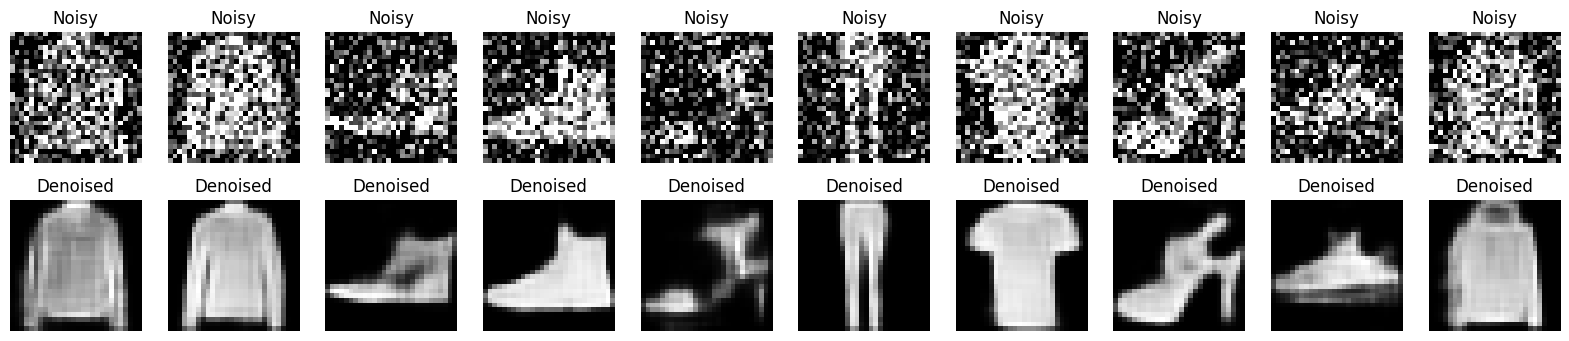

In [55]:
display_noisy_and_denoised_images(autoencoder, test_dataset)